In [4]:
"""
This is a temporary script file.
Resources:
    https://www.tutorialspoint.com/matplotlib/matplotlib_axes_class.htm

"""

import pandas as pd
import matplotlib


'''DESIRED CHART:
    -grouped bar chart
    -each group represents a time period (weekdays, weekends, etc)
    -each bar series represents a year
    -title is the project description + direction
    -will have separate, side-by-side charts, 1 chart for each direction
    -bars will have data labels showing their values
    
'''

# =============PREPARATION STEPS

# import sample data
in_csv = r'/Users/darrenconly/PythonProjects/CodeSnippets/DataViz/py_matplotlib/sample_data_csvs/speed_data_x_project.csv'
df = pd.read_csv(in_csv)


# column names: 'measure_full', 'value', 'proj_desc', 'proj_inum', 'data_year', 'direction', 'measure'

# filter to only one test project

proj = df['proj_desc'][0]
direcn = df['direction'][0]

dfp = df.loc[(df['proj_desc'] == proj) & (df['direction'] == direcn) \
             & df['measure'].str.contains('lottr')]
    


chart_title = f'{proj} - {direcn}'

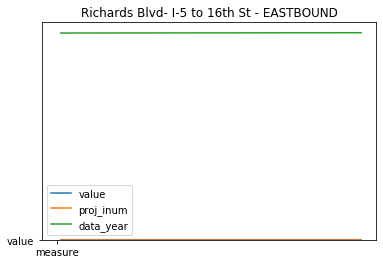

In [4]:
# ===========METHOD 1: BUILD THE CHART USING PANDAS PLOTTING==========
'''Advantages to using Pandas plotting:
    -simple, fewer lines of code
Disadvangates:
'''
#set up the initial matplotlib axes object 
ax = dfp.plot(title=chart_title)

# each year of data will be a series of bars
for i in [2016, 2019]:
    dfi = dfp.loc[dfp['data_year'] == i]
    ax.bar(x='measure', height='value')

In [5]:
dfi = dfp.loc[dfp['data_year'] == 2016]
dfj = dfp.loc[dfp['data_year'] == 2019]

print(dfi)
print(dfj)

          measure_full     value                      proj_desc  proj_inum  \
3  EASTBOUNDlottr_ampk  1.294696  Richards Blvd- I-5 to 16th St          1   
4    EASTBOUNDlottr_md  1.294705  Richards Blvd- I-5 to 16th St          1   
5  EASTBOUNDlottr_pmpk  1.396554  Richards Blvd- I-5 to 16th St          1   
6  EASTBOUNDlottr_wknd  1.349272  Richards Blvd- I-5 to 16th St          1   

   data_year  direction     measure  
3       2016  EASTBOUND  lottr_ampk  
4       2016  EASTBOUND    lottr_md  
5       2016  EASTBOUND  lottr_pmpk  
6       2016  EASTBOUND  lottr_wknd  
            measure_full     value                      proj_desc  proj_inum  \
255  EASTBOUNDlottr_ampk  1.345554  Richards Blvd- I-5 to 16th St          1   
256    EASTBOUNDlottr_md  1.343295  Richards Blvd- I-5 to 16th St          1   
257  EASTBOUNDlottr_pmpk  1.579484  Richards Blvd- I-5 to 16th St          1   
258  EASTBOUNDlottr_wknd  1.388547  Richards Blvd- I-5 to 16th St          1   

     data_year  di

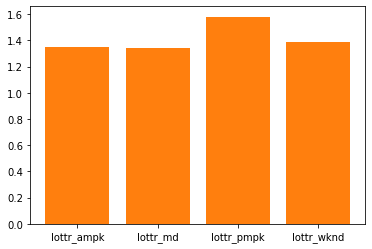

In [6]:
# ===========METHOD 2: BUILD THE CHART USING ONLY MATPLOTLIB INLINE plot() ==========
# pyplot is the inline way of plotting; ax is the object-oriented way of plotting
# plt can be shown inline with plt.show() command
# https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html

import matplotlib.pyplot as plt


# The Figure is like a canvas, and the Axes is a part of that canvas on 
# which we will make a particular visualization.
fig, ax = plt.subplots()

# for i in [2016, 2019]:
#     dfi = dfp.loc[dfp['data_year'] == i]
#     ax.bar(dfi['measure'], dfi['value'])

dfi = dfp.loc[dfp['data_year'] == 2016]
dfj = dfp.loc[dfp['data_year'] == 2019]

s1 = ax.bar(dfi['measure'], dfi['value'])
s2 = ax.bar(dfj['measure'], dfj['value'])

plt.show()

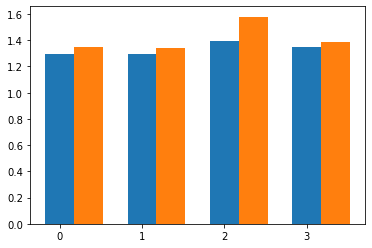

In [8]:
# ===========METHOD 2: BUILD THE CHART USING ONLY MATPLOTLIB INLINE plot() ==========
# pyplot is the inline way of plotting; ax is the object-oriented way of plotting
# plt can be shown inline with plt.show() command
# https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html

import matplotlib.pyplot as plt


# The Figure is like a canvas, and the Axes is a part of that canvas on 
# which we will make a particular visualization.
fig, ax = plt.subplots()

# for i in [2016, 2019]:
#     dfi = dfp.loc[dfp['data_year'] == i]
#     ax.bar(dfi['measure'], dfi['value'])

dfi = dfp.loc[dfp['data_year'] == 2016]
dfj = dfp.loc[dfp['data_year'] == 2019]

x_locns = [i for i, v in enumerate(dfi['measure'])]

bar_width = 0.35

plt.bar(x_locns, dfi['value'], bar_width)
plt.bar([i + bar_width for i in x_locns], dfj['value'], bar_width)

ax.set_xticks(x_locns)

plt.show()

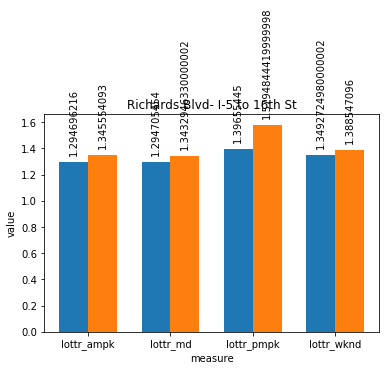

In [9]:
# ===========METHOD 2A: BUILD THE CHART USING ONLY MATPLOTLIB INLINE plot() ==========
# pyplot is the inline way of plotting; ax is the object-oriented way of plotting
# plt can be shown inline with plt.show() command
# https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html

import matplotlib.pyplot as plt


# The Figure is like a canvas, and the Axes is a part of that canvas on 
# which we will make a particular visualization.
fig, ax = plt.subplots()

# set the width of each bar
bar_width = 0.35

# the values that will be shown for each tick mark on the x axis
x_label_vals = dfp['measure'].unique()
x_labels = ax.set_xticklabels(x_label_vals)

# the distance along the x axis at which the x-axis label will be placed
x_label_posns = [i + (bar_width/2) for i, v in enumerate(x_label_vals)]
ax.set_xticks(x_label_posns)

# set title, axis titles
chart_title = dfp['proj_desc'].iloc[0]
axislabel_x = dfp['measure'].name
axislabel_y = dfp['value'].name

ax.set_title(chart_title)
ax.set_xlabel(axislabel_x)
ax.set_ylabel(axislabel_y)

# these values will be a different color on the bar chart
data_series = dfp['data_year'].unique()



for x_posn, year in enumerate(data_series):
    
    # make sure each color in the series is visible and right next
    # to the previous color, immediatly to the right
    adder = x_posn * bar_width
    x_locns = [i + adder for i, v in enumerate(dfi['measure'])]
    
    # add the values for that series to the bar chart
    dfi = dfp.loc[dfp['data_year'] == year]
    bar_rectangles = ax.bar(x_locns, dfi['value'], bar_width)
    
    # add annotations to each bar showing each bar's value for each bar within the data series
    for bar_rect in bar_rectangles:
        offset_x = 0 # horizontal offset, in chart units
        offset_y = .05 # vertical offset, in chart units
        
        data_val = bar_rect.get_height() 
        label_x_pos = bar_rect.get_x() + bar_rect.get_width() / 2

        # ax.annotate(<val to show>, x/y position of text label)
        ax.annotate(s=f"{data_val}", xy=(label_x_pos, data_val),
                   xytext=(label_x_pos + offset_x, data_val + offset_y),
                   horizontalalignment='center', verticalalignment='bottom' ,rotation=90)
                    # xycoords=(label_x_pos + offset_x, data_val + offset_y)) 
            
        # all annotate params before xytext arg - https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.axes.Axes.annotate.html
        # all annotate params after xytext arg - https://matplotlib.org/3.3.0/api/text_api.html#matplotlib.text.Text
    



plt.show()

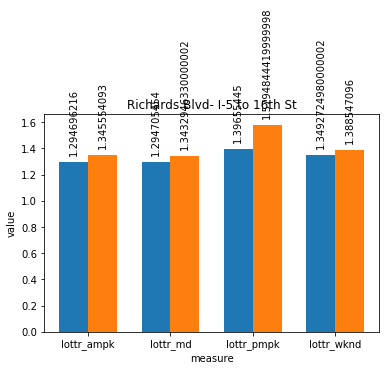

In [18]:
# ===========METHOD 2B: Method 2 packaged as a function==========
# pyplot is the inline way of plotting; ax is the object-oriented way of plotting
# plt can be shown inline with plt.show() command
# https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html

import matplotlib.pyplot as plt

def make_bar_chart(in_df, col_xticklabels, col_yvals, col_series_categs=None, col_chart_title=None,
                  single_series_name='', yval_numformat='numeric'):
    # The Figure is like a canvas, and the Axes is a part of that canvas on 
    # which we will make a particular visualization.
    fig, ax = plt.subplots()

    # set the width of each bar
    bar_width = 0.35

    # the values that will be shown for each tick mark on the x axis
    x_label_vals = in_df[col_xticklabels].unique()  # dfp['measure'].unique()
    x_labels = ax.set_xticklabels(x_label_vals)

    # the distance along the x axis at which the x-axis label will be placed
    x_label_posns = [i + (bar_width/2) for i, v in enumerate(x_label_vals)]
    ax.set_xticks(x_label_posns)

    # set title, axis titles
    if col_chart_title is not None:
        chart_title = in_df[col_chart_title].iloc[0] # dfp['proj_desc'].iloc[0]
    else:
        chart_title = ''
    axislabel_x = dfp[col_xticklabels].name
    axislabel_y = dfp[col_yvals].name # dfp['value'].name

    ax.set_title(chart_title)
    ax.set_xlabel(axislabel_x)
    ax.set_ylabel(axislabel_y)

    # these values will be a different color on the bar chart
    if col_series_categs is not None:
        data_series = in_df[col_series_categs].unique()  # dfp['data_year'].unique()
    else:
        data_series = [single_series_name] # for single series (ie., not series grouped together by xticks)
        
    # format how numbers will appear in the chart
    
        

    for x_posn, series_val in enumerate(data_series):

        # make sure each color in the series is visible and right next
        # to the previous color, immediatly to the right
        adder = x_posn * bar_width
        x_locns =  [i + adder for i, v in enumerate(x_label_posns)] # [i + adder for i, v in enumerate(dfi['measure'])]

        # add the values for that series to the bar chart
        if col_series_categs is not None:
            df_seriesfilter = in_df.loc[dfp[col_series_categs] == series_val]
        else:
            df_seriesfilter = in_df

        bar_rectangles = ax.bar(x_locns, df_seriesfilter[col_yvals], bar_width)

        # add annotations to each bar showing each bar's value for each bar within the data series
        for bar_rect in bar_rectangles:
            offset_x = 0 # horizontal offset, in chart units
            offset_y = .05 # vertical offset, in chart units

            data_val = bar_rect.get_height() 
            label_x_pos = bar_rect.get_x() + bar_rect.get_width() / 2

            # ax.annotate(<val to show>, x/y position of text label)
            ax.annotate(s=f"{data_val}", xy=(label_x_pos, data_val),
                       xytext=(label_x_pos + offset_x, data_val + offset_y),
                       horizontalalignment='center', verticalalignment='bottom' ,rotation=90)
                        # xycoords=(label_x_pos + offset_x, data_val + offset_y)) 

            # all annotate params before xytext arg - https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.axes.Axes.annotate.html
            # all annotate params after xytext arg - https://matplotlib.org/3.3.0/api/text_api.html#matplotlib.text.Text


    plt.show()

# make_bar_chart(in_df, col_xticklabels, col_yvals, col_series_categs=None, col_chart_title=None, single_series_name='')
make_bar_chart(dfp, 'measure', 'value', col_series_categs='data_year', col_chart_title='proj_desc',
                  single_series_name='')

In [10]:
df_seriesfilter.head()

NameError: name 'df_seriesfilter' is not defined